In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Load Data
df = pd.read_csv('BDataF.csv')
df_test = pd.read_csv('BDataTest.csv')

# Renaming Dummy Columns
df = pd.concat([df, pd.get_dummies(df['DateRose'], prefix='DateRose')], axis=1)
df = pd.concat([df, pd.get_dummies(df['ContestantRace'], prefix='Race')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['DateRose'], prefix='DateRose')], axis=1)
df_test = pd.concat([df_test, pd.get_dummies(df_test['ContestantRace'], prefix='Race')], axis=1)



BachelorData = df
BachelorTestData = df_test

In [3]:
# List Column Names
#list(BachelorData)
#list(BachelorTestData)

In [3]:
feature_cols = [
                 'FirstImpressionRose',
                 'DateRose',
                 'AbsDistFromBachelorAge',
                 'RelDistFromBachelorAge',
                 'OlderthanBachelor',
                 'YoungerthanBachelor',
                 'SameAgeasBachelor',
                 'SameHairasBachelorette',
                 'DistFromBacheloretteAge',
                 'AbsDistFromBacheloretteAge',
                 'OlderThanBachelorette',
                 'YoungerThanBachelorette',
                 'SameAgeasBachelorette',
                 'SameRaceasBachelorette',
                 'DateRose_0',
                 'DateRose_1',
                 'DateRose_2',
                 'Race_Asian',
                 'Race_Black',
                 'Race_White'
                ]

X = BachelorData[feature_cols]
y = BachelorData['Winner']

In [4]:
# Fitting a regression model
from sklearn.ensemble import RandomForestRegressor

rf_regression = RandomForestRegressor(n_estimators=100, oob_score=True)
rf_regression.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

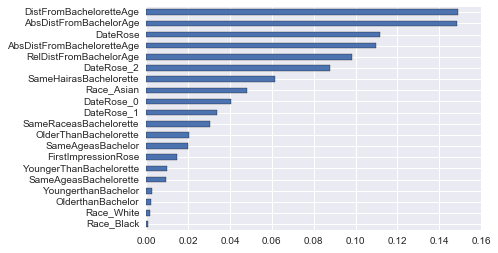

In [5]:
# Plotting Random Forest Regression Model Feature Importance

feature_importance = pd.Series(rf_regression.feature_importances_, index=X.columns)
feature_importance.sort_values(inplace=True)
feature_importance.plot(kind='barh')

C:\Users\ochang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:723: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


10 trees
roc:  0.450177935943

30 trees
roc:  0.532740213523

50 trees
roc:  0.52793594306

100 trees
roc:  0.513701067616

200 trees
roc:  0.614412811388

500 trees
roc:  0.64768683274

1000 trees
roc:  0.675444839858

2000 trees
roc:  0.634519572954

5000 trees
roc:  0.698754448399



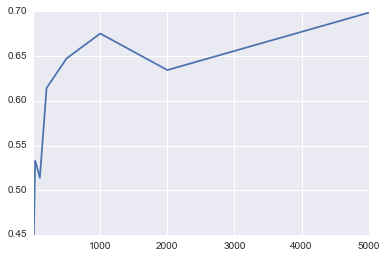

In [6]:
# Finding the optimal number of trees for Random Forest Regressor
from sklearn.metrics import roc_auc_score

results = []
n_estimator_options = [10, 30, 50, 100, 200, 500, 1000, 2000, 5000]

for trees in n_estimator_options:
    rf_regression = RandomForestRegressor(trees, oob_score=True, n_jobs=-1)
    rf_regression.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, rf_regression.oob_prediction_)
    print "roc: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot()

In [7]:
X_new = BachelorTestData[feature_cols]

BachelorTestData['RandomForestRegressionPrediction'] = rf_regression.predict(X_new)

BachelorTestData.head()

,Name,Age,Season,FirstImpressionRose,DateRose,FirstName,LastName,State,AbsDistFromBachelorAge,RelDistFromBachelorAge,...,SameAgeasBachelorette,BacheloretteRace,SameRaceasBachelorette,DateRose_0,DateRose_1,DateRose_2,Race_Asian,Race_Black,Race_White,RandomForestRegressionPrediction
0,Brittany Farrar,26,21,0,0,Brittany,Farrar,California,10,10,...,0,White,1,1.0,0.0,0.0,0.0,0.0,1.0,0.00000
1,Whitney Fransway,25,21,0,0,Whitney,Fransway,Minnesota,11,11,...,1,White,1,1.0,0.0,0.0,0.0,0.0,1.0,0.00000
2,Raven Gates,25,21,0,1,Raven,Gates,Arkansas,11,11,...,1,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.21750
3,Jasmine Goode,29,21,0,0,Jasmine,Goode,New Jersey,7,7,...,0,White,0,1.0,0.0,0.0,0.0,1.0,0.0,0.00020
4,Vanessa Grimaldi,29,21,0,1,Vanessa,Grimaldi,Canada,7,7,...,0,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.08523


In [ ]:
BachelorTestData['PredictProbab'] = rf_regression.predict_probab

In [10]:
from sklearn.cross_validation import cross_val_score

rf = RandomForestRegressor(n_estimators = 2000,
                          oob_score=True,
                          n_jobs=-1)

rf.fit(X, y)
score = roc_auc_score(y, rf.oob_prediction_)
print score

C:\Users\ochang\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


0.676868327402


In [11]:
BachelorTestData[BachelorTestData.RandomForestRegressionPrediction > .10]

,Name,Age,Season,FirstImpressionRose,DateRose,FirstName,LastName,State,AbsDistFromBachelorAge,RelDistFromBachelorAge,...,SameAgeasBachelorette,BacheloretteRace,SameRaceasBachelorette,DateRose_0,DateRose_1,DateRose_2,Race_Asian,Race_Black,Race_White,RandomForestRegressionPrediction
2,Raven Gates,25,21,0,1,Raven,Gates,Arkansas,11,11,...,1,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.226077
8,Danielle Lombard,27,21,0,2,Danielle,Lombard,California,9,9,...,0,White,0,0.0,0.0,1.0,1.0,0.0,0.0,0.134568
11,Corinne Olympios,24,21,0,1,Corinne,Olympios,Florida,12,12,...,0,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.139427
12,Kristina Schulman,24,21,0,1,Kristina,Schulman,Kentucky,12,12,...,0,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.188175
16,Christen Whitney,25,21,0,1,Christen,Whitney,Indiana,11,11,...,1,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.226077


10 trees
roc:  0.439501779359

30 trees
roc:  0.509608540925

50 trees
roc:  0.519928825623

100 trees
roc:  0.544306049822

200 trees
roc:  0.566903914591

500 trees
roc:  0.647330960854

1000 trees
roc:  0.60640569395



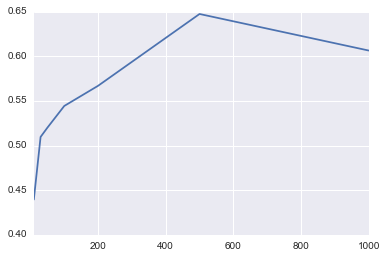

In [12]:
# Finding the optimal number of trees for Random Forest Regressor
from sklearn.metrics import roc_auc_score

results = []
n_estimator_options = [10, 30, 50, 100, 200, 500, 1000]

for trees in n_estimator_options:
    rf_regression = RandomForestRegressor(trees, oob_score=True, n_jobs=-1)
    rf_regression.fit(X, y)
    print trees, "trees"
    roc = roc_auc_score(y, rf_regression.oob_prediction_)
    print "roc: ", roc
    results.append(roc)
    print ""
    
pd.Series(results, n_estimator_options).plot()

In [13]:
# Using the sklearn Decision Tree Regressor
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf = clf.fit(X, y)

BachelorTestData['DecisionTreePrediction'] = clf.predict(X_new)

BachelorTestData[BachelorTestData.DecisionTreePrediction>0]

,Name,Age,Season,FirstImpressionRose,DateRose,FirstName,LastName,State,AbsDistFromBachelorAge,RelDistFromBachelorAge,...,BacheloretteRace,SameRaceasBachelorette,DateRose_0,DateRose_1,DateRose_2,Race_Asian,Race_Black,Race_White,RandomForestRegressionPrediction,DecisionTreePrediction
2,Raven Gates,25,21,0,1,Raven,Gates,Arkansas,11,11,...,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.226077,0.25
8,Danielle Lombard,27,21,0,2,Danielle,Lombard,California,9,9,...,White,0,0.0,0.0,1.0,1.0,0.0,0.0,0.134568,1.00
12,Kristina Schulman,24,21,0,1,Kristina,Schulman,Kentucky,12,12,...,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.188175,0.50
16,Christen Whitney,25,21,0,1,Christen,Whitney,Indiana,11,11,...,White,1,0.0,1.0,0.0,0.0,0.0,1.0,0.226077,0.25


In [14]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X, y)

BachelorTestData['SVMRegression'] = clf.predict(X_new)
BachelorTestData

,Name,Age,Season,FirstImpressionRose,DateRose,FirstName,LastName,State,AbsDistFromBachelorAge,RelDistFromBachelorAge,...,SameRaceasBachelorette,DateRose_0,DateRose_1,DateRose_2,Race_Asian,Race_Black,Race_White,RandomForestRegressionPrediction,DecisionTreePrediction,SVMRegression
0,Brittany Farrar,26,21,0,0,Brittany,Farrar,California,10,10,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0
1,Whitney Fransway,25,21,0,0,Whitney,Fransway,Minnesota,11,11,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0
2,Raven Gates,25,21,0,1,Raven,Gates,Arkansas,11,11,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.226077,0.25,0
3,Jasmine Goode,29,21,0,0,Jasmine,Goode,New Jersey,7,7,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.000200,0.00,0
4,Vanessa Grimaldi,29,21,0,1,Vanessa,Grimaldi,Canada,7,7,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.088518,0.00,0
5,Jaimi King,28,21,0,0,Jaimi,King,Louisiana,8,8,...,0,1.0,0.0,0.0,0.0,1.0,0.0,0.000200,0.00,0
6,Rachel Lindsay,31,21,1,1,Rachel,Lindsay,Texas,5,5,...,0,0.0,1.0,0.0,0.0,1.0,0.0,0.026485,0.00,0
7,Astrid Loch,26,21,0,0,Astrid,Loch,Florida,10,10,...,1,1.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.00,0
8,Danielle Lombard,27,21,0,2,Danielle,Lombard,California,9,9,...,0,0.0,0.0,1.0,1.0,0.0,0.0,0.134568,1.00,0
9,Danielle Maltby,31,21,0,1,Danielle,Maltby,Wisconsin,5,5,...,1,0.0,1.0,0.0,0.0,0.0,1.0,0.039365,0.00,0
